<a href="https://colab.research.google.com/github/nmaiya/ColabTimeSeries/blob/main/ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:00


In [31]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

%matplotlib inline

In [7]:
femaleBirth=pd.read_csv('/content/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
femaleBirth.index.freq='D'
femaleBirth=femaleBirth[:120]

In [9]:
tradeInv=pd.read_csv('/content/TradeInventories.csv',index_col='Date',parse_dates=True)
tradeInv.index.freq='MS'
tradeInv

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294
...,...
2018-08-01,2127170
2018-09-01,2134172
2018-10-01,2144639


In [11]:
# ARIMA

<Axes: xlabel='Date'>

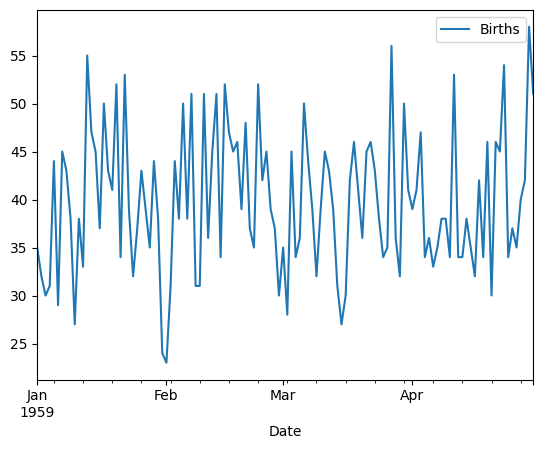

In [12]:
femaleBirth.plot()

In [15]:
auto_arima(femaleBirth['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Tue, 16 Jul 2024   AIC                            823.489
Time:                        21:18:39   BIC                            829.064
Sample:                    01-01-1959   HQIC                           825.753
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
train=femaleBirth.iloc[:90]
test=femaleBirth.iloc[90:]

In [37]:
results=ARIMA(train['Births'],order=(2,0,2)).fit()

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -307.812
Date:                Tue, 16 Jul 2024   AIC                            627.625
Time:                        21:32:31   BIC                            642.624
Sample:                    01-01-1959   HQIC                           633.673
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7571      1.017     39.091      0.000      37.764      41.750
ar.L1         -0.4654      1.003     -0.464      0.643      -2.431       1.501
ar.L2          0.5086      0.940      0.541      0.589      -1.334       2.351
ma.L1          0.5613     11.784      0.048      0.962     -22.535      23.657
ma.L2         -0.4385      5.086     -0.086      0.931     -10.407       9.530
sigma2        54.3790    623.600      0.087      0.931   -1167.855    1276.613
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.96   Prob(JB):                         0.37
Heteroskedasticity (H):               0.92   Skew:                             0.16
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
start=len(train)
end=len(train)+len(test)-1
predctions=results.predict(start=start,end=end).rename('ARIMA(2,0,2)')

<Axes: xlabel='Date'>

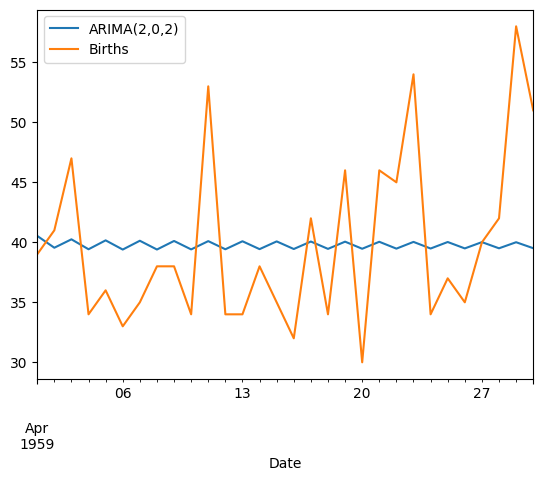

In [42]:
predctions.plot(legend=True)
test['Births'].plot(legend=True)

In [43]:
test.mean()

Births    39.833333
dtype: float64

In [44]:
predctions.mean()

39.785507935774895